# Global Data on Sustainable Energy (2000-2020)

https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data

This comprehensive dataset showcasing sustainable energy indicators and other useful factors across all countries from 2000 to 2020. 


## Questions

1. Access to electricity (% of population), lowest and highest countries?

2. Which are most selling product

3. On what products should be emphasized for marketing?

4. On which propositon/product customer has less interested in investment by Tenure?

5. Proposition by Customers, Investors and Revenue?

6. Is TRB has impact on revenue generation 

7. How customers are digitally active based on propositon/product

#### Include libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import wbgapi as wb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

### Read Data from csv file and through API

In [2]:
df = pd.read_csv('global-data-on-sustainable-energy.csv')
display(df.head())
display(df.shape)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


(3649, 21)

#### Current health expenditure per capita from World Bank through API

In [3]:
health = wb.data.DataFrame(['SH.XPD.CHEX.PC.CD'], time = range(2000,2021),labels=True)
health = pd.DataFrame(health).reset_index()
health.head()

,economy,Country,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
0,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.249458,87.494652,89.260956,100.136932,114.444298,105.098030,106.189697,92.254311,114.633598,54.808506,50.676510
1,ZMB,Zambia,26.036491,26.323874,27.114857,32.51955,39.201366,49.429550,62.614231,49.344803,55.919750,50.960819,54.645390,56.895809,67.981705,86.344048,66.047142,57.990551,55.984695,65.821213,74.597534,67.457771,53.753658
2,YEM,"Yemen, Rep.",24.136793,25.455067,26.282944,33.58860,36.898983,40.907562,48.032043,55.675426,66.465805,62.604012,64.443275,61.270248,70.128960,74.300758,75.416016,63.300209,NaN,NaN,NaN,NaN,NaN
3,PSE,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning
#### columns rename process

In [4]:
dic = {
  " ": "_",
  "%": "",
  "#": "",
  "(": "",
  ")": "",
  "$": "",
  "/": "_",
  "\n": "",
  "-": "_",
  "__": "_",
}

In [5]:
def format_columns(df_clr, dic):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        df : dataframe
        dic: dictionary
    Return:
        clean columns
    """
    # Remove special characters
    
    df_clr = df_clr.rename(columns=str.lower)
    
    for x, y in dic.items():
        df_clr.columns = df_clr.columns.str.replace(x,y)
    
    df_clr.columns = df_clr.columns.str.strip("_")
    
    return df_clr.columns

In [8]:
df.columns = format_columns(df,dic)
df.columns

Index(['entity', 'year', 'access_to_electricity_of_population',
       'access_to_clean_fuels_for_cooking',
       'renewable_electricity_generating_capacity_per_capita',
       'financial_flows_to_developing_countries_us',
       'renewable_energy_share_in_the_total_final_energy_consumption',
       'electricity_from_fossil_fuels_twh', 'electricity_from_nuclear_twh',
       'electricity_from_renewables_twh', 'low_carbon_electricity_electricity',
       'primary_energy_consumption_per_capita_kwh_person',
       'energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp',
       'value_co2_emissions_kt_by_country',
       'renewables_equivalent_primary_energy', 'gdp_growth', 'gdp_per_capita',
       'density\np_km2', 'land_areakm2', 'latitude', 'longitude'],
      dtype='object')

In [7]:
health.columns
health = health.rename(columns=str.lower)
health.columns = health.columns.str.replace('yr','')
health.head(3)

,economy,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ZWE,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.249458,87.494652,89.260956,100.136932,114.444298,105.098030,106.189697,92.254311,114.633598,54.808506,50.676510
1,ZMB,Zambia,26.036491,26.323874,27.114857,32.51955,39.201366,49.429550,62.614231,49.344803,55.919750,50.960819,54.645390,56.895809,67.981705,86.344048,66.047142,57.990551,55.984695,65.821213,74.597534,67.457771,53.753658
2,YEM,"Yemen, Rep.",24.136793,25.455067,26.282944,33.58860,36.898983,40.907562,48.032043,55.675426,66.465805,62.604012,64.443275,61.270248,70.128960,74.300758,75.416016,63.300209,NaN,NaN,NaN,NaN,NaN


#### Add new column , health_expenditure_per_capita , to the base dataframe

In [9]:
country = df.entity.unique()

In [10]:
val = []

'''
paremeters
new_data pandas dataframe
return list
'''

def create_data_from_api_data(new_data):
    
    for cnt in country:
        expend = new_data[new_data['country'] == cnt].iloc[0:,2:]
        year = df[df['entity'] == cnt]['year']
        for yr in year:
            col_yr_str = str(yr)
            if  col_yr_str in expend.columns:
                v = expend[col_yr_str].values
                if v:
                    val.append(round(v[0],2))
                else:
                    val.append(0)
    return val

#### Merge new column to the main dataframe df

In [11]:
df['health_expenditure_per_capita'] = create_data_from_api_data(health)

#### save merged data in a csv file

In [12]:
df.to_csv('merged-datasustainable-energy.csv',index=False)

#### read data from merged file

In [13]:
data = pd.read_csv('merged-datasustainable-energy.csv')
display(data.head(5))
display(data.shape)

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,financial_flows_to_developing_countries_us,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,renewables_equivalent_primary_energy,gdp_growth,gdp_per_capita,density\np_km2,land_areakm2,latitude,longitude,health_expenditure_per_capita
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,NaN
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,NaN
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,17.01
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,17.81
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,21.43


(3649, 22)

#### Checking null values

In [14]:
data.isnull().sum()

entity                                                             0
year                                                               0
access_to_electricity_of_population                               10
access_to_clean_fuels_for_cooking                                169
renewable_electricity_generating_capacity_per_capita             931
financial_flows_to_developing_countries_us                      2089
renewable_energy_share_in_the_total_final_energy_consumption     194
electricity_from_fossil_fuels_twh                                 21
electricity_from_nuclear_twh                                     126
electricity_from_renewables_twh                                   21
low_carbon_electricity_electricity                                42
primary_energy_consumption_per_capita_kwh_person                   0
energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp         207
value_co2_emissions_kt_by_country                                428
renewables_equivalent_primary_ener

#### Percentage of Null values

In [15]:
cols_with_null = data.columns[data.isnull().sum() > 0]
cols_nan_percentage = pd.DataFrame(round((100 * data[cols_with_null].isnull().sum()/len(data.index)),2)).reset_index()
cols_nan_percentage.columns = ['col_name','percentage']
cols_nan_percentage

,col_name,percentage
0,access_to_electricity_of_population,0.27
1,access_to_clean_fuels_for_cooking,4.63
2,renewable_electricity_generating_capacity_per_...,25.51
3,financial_flows_to_developing_countries_us,57.25
4,renewable_energy_share_in_the_total_final_ener...,5.32
5,electricity_from_fossil_fuels_twh,0.58
6,electricity_from_nuclear_twh,3.45
7,electricity_from_renewables_twh,0.58
8,low_carbon_electricity_electricity,1.15
9,energy_intensity_level_of_primary_energy_mj_20...,5.67


#### drop columns that have over 50% missing values

In [16]:
cols_nan_percentage_ov_50 = cols_nan_percentage[cols_nan_percentage['percentage'] > 50].reset_index()
drop_list = list(cols_nan_percentage_ov_50['col_name'])
drop_list.extend(['latitude','longitude'])
data = data.drop(drop_list, axis=1)
data.head(3)

,entity,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,density\np_km2,land_areakm2,health_expenditure_per_capita
0,Afghanistan,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60,652230.0,NaN
1,Afghanistan,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60,652230.0,NaN
2,Afghanistan,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60,652230.0,17.01


#### Check duplicate rows

In [17]:
dups = data.duplicated()
dups.sum()

0

#### Split into categorical and numerical

In [18]:
numerical = data.select_dtypes(np.number)
numerical.head(5)

,year,access_to_electricity_of_population,access_to_clean_fuels_for_cooking,renewable_electricity_generating_capacity_per_capita,renewable_energy_share_in_the_total_final_energy_consumption,electricity_from_fossil_fuels_twh,electricity_from_nuclear_twh,electricity_from_renewables_twh,low_carbon_electricity_electricity,primary_energy_consumption_per_capita_kwh_person,energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp,value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,land_areakm2,health_expenditure_per_capita
0,2000,1.613591,6.2,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,652230.0,NaN
1,2001,4.074574,7.2,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,652230.0,NaN
2,2002,9.409158,8.2,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,652230.0,17.01
3,2003,14.738506,9.5,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0,17.81
4,2004,20.064968,10.9,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0,21.43


In [19]:
categorical = data.select_dtypes(include='object')
categorical.head(5)

,entity,density\np_km2
0,Afghanistan,60
1,Afghanistan,60
2,Afghanistan,60
3,Afghanistan,60
4,Afghanistan,60


## Wrangling Data

In [20]:
numerical.nunique()

year                                                              21
access_to_electricity_of_population                             2040
access_to_clean_fuels_for_cooking                                896
renewable_electricity_generating_capacity_per_capita            2110
renewable_energy_share_in_the_total_final_energy_consumption    2587
electricity_from_fossil_fuels_twh                               1859
electricity_from_nuclear_twh                                     547
electricity_from_renewables_twh                                 1533
low_carbon_electricity_electricity                              2647
primary_energy_consumption_per_capita_kwh_person                3628
energy_intensity_level_of_primary_energy_mj_2017_ppp_gdp        1044
value_co2_emissions_kt_by_country                               2397
gdp_growth                                                      3320
gdp_per_capita                                                  3367
land_areakm2                      

In [21]:
categorical.nunique()

entity            176
density\np_km2    124
dtype: int64

## EDA

In [22]:
numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,3649.0,2010.038367,6.054228e+00,2000.000000,2005.000000,2010.000000,2015.000000,2.020000e+03
access_to_electricity_of_population,3639.0,78.933702,3.027554e+01,1.252269,59.800890,98.361570,100.000000,1.000000e+02
access_to_clean_fuels_for_cooking,3480.0,63.255287,3.904366e+01,0.000000,23.175000,83.150000,100.000000,1.000000e+02
renewable_electricity_generating_capacity_per_capita,2718.0,113.137498,2.441673e+02,0.000000,3.540000,32.910000,112.210000,3.060190e+03
renewable_energy_share_in_the_total_final_energy_consumption,3455.0,32.638165,2.989490e+01,0.000000,6.515000,23.300000,55.245000,9.604000e+01
electricity_from_fossil_fuels_twh,3628.0,70.365003,3.480519e+02,0.000000,0.290000,2.970000,26.837500,5.184130e+03
electricity_from_nuclear_twh,3523.0,13.450190,7.300662e+01,0.000000,0.000000,0.000000,0.000000,8.094100e+02
electricity_from_renewables_twh,3628.0,23.968010,1.044311e+02,0.000000,0.040000,1.470000,9.600000,2.184940e+03
low_carbon_electricity_electricity,3607.0,36.801182,3.431488e+01,0.000000,2.877847,27.865068,64.403792,1.000000e+02
primary_energy_consumption_per_capita_kwh_person,3649.0,25743.981745,3.477322e+04,0.000000,3116.737300,13120.570000,33892.780000,2.625857e+05


#### Correlation of Numerical data

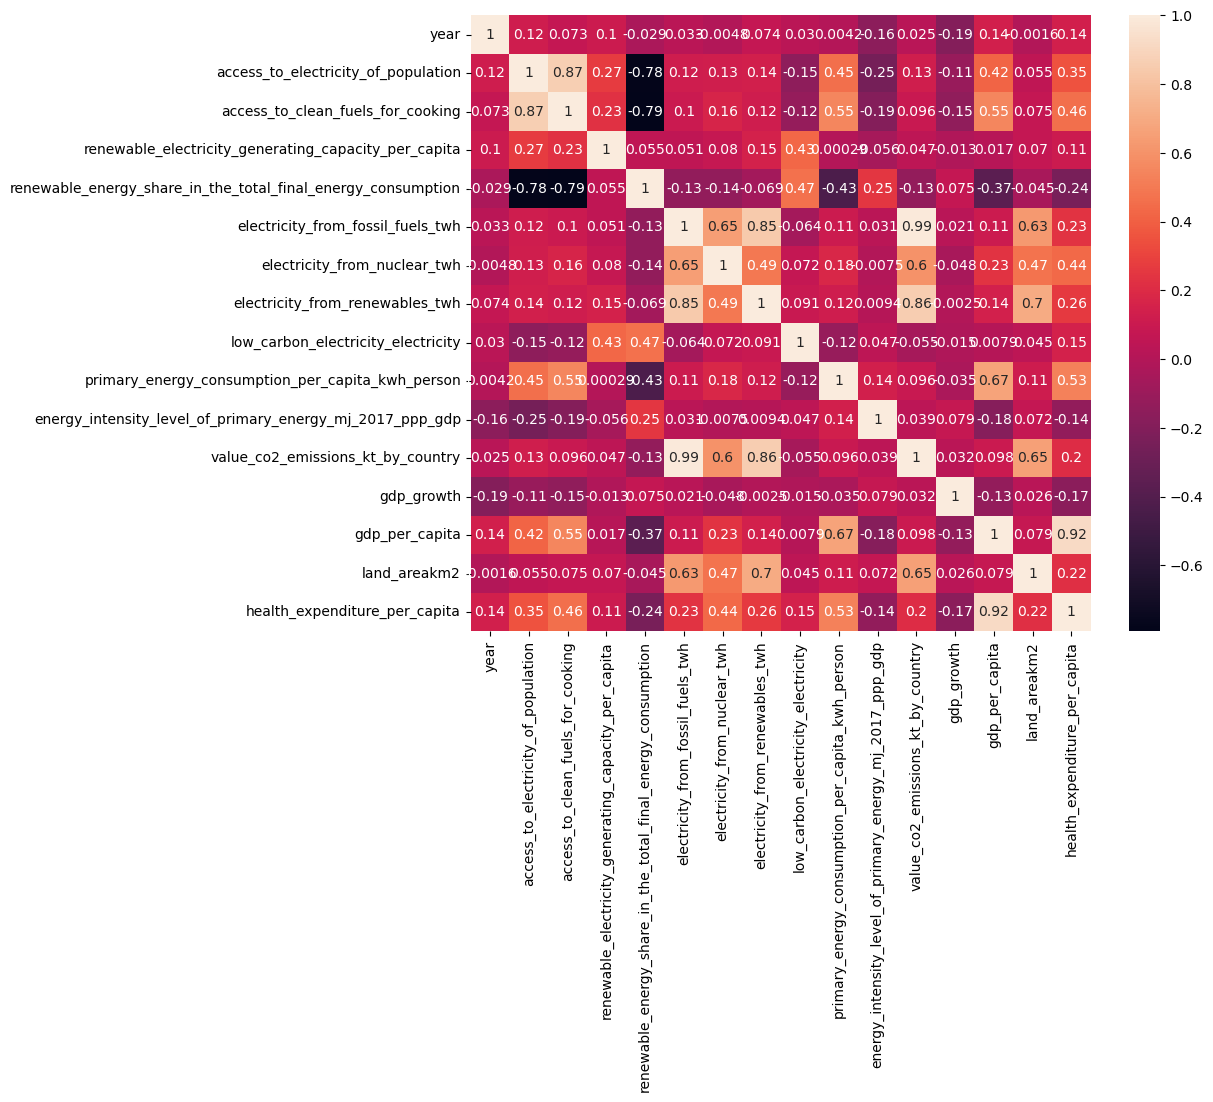

In [23]:
correlations = numerical.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, annot=True)
plt.show()